/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: tsne_plot_DNABERT.png


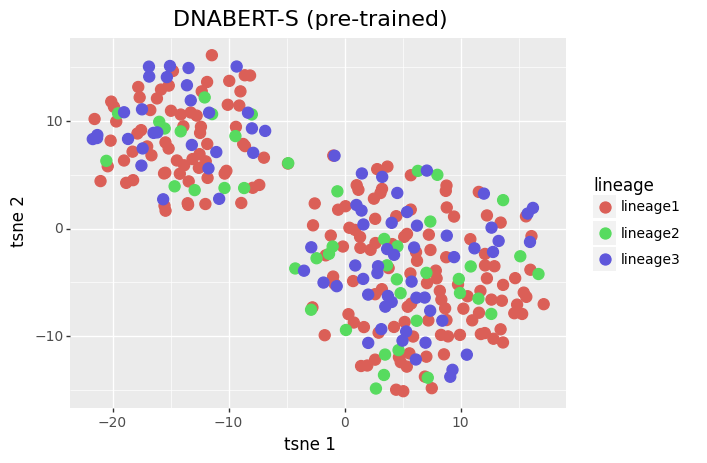

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from plotnine import ggplot, aes, geom_point, labs, theme, theme_bw,element_text
embed=np.load("../scripts/Deep_train/random_embeddings.npy")

tsne = TSNE(n_components=2, random_state=40)
embedding_2d = tsne.fit_transform(embed)

lineage=pd.read_csv("../scripts/Deep_train/lineage.csv",header=None)

df=pd.DataFrame()
df["tsne_1"]=embedding_2d[:,0]
df["tsne_2"]=embedding_2d[:,1]
df["lineage"]=lineage[0]

plot = (
    ggplot(df) +
    aes(x='tsne_1', y='tsne_2', color='lineage') +  # Map 'lineage' to color
    geom_point(size=4) +  # Create scatter plot
    labs(title='DNABERT-S (pre-trained)', x='tsne 1', y='tsne 2') +  # Titles and axis labels
     theme(
            plot_title=element_text(size=16),                  # Title font size
            axis_title_x=element_text(size=12),                # X-axis title font size
            axis_title_y=element_text(size=12),                # Y-axis title font size
            axis_text_x=element_text(size=10),                 # X-axis tick labels font size
            axis_text_y=element_text(size=10),                 # Y-axis tick labels font size
            legend_title=element_text(size=12),                # Legend title font size
            legend_text=element_text(size=10)                  # Legend labels font size
        ) 
)

# Display the plot
plot.save("tsne_plot_DNABERT.png", width=8, height=10, dpi=300)
print(plot)


/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/llvmlite/llvmpy/__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/llvmlite/llvmpy/core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/llvmlite/llvmpy/passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.


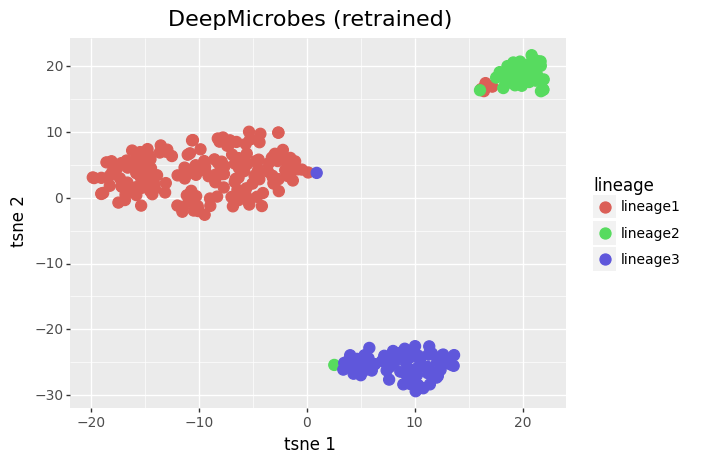

/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: tsne_plot_Deep.png


In [19]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from plotnine import ggplot, aes, geom_point, labs, theme, theme_bw
embed=np.load("/data/users/CS18D017/invitro_reduced_tfrec/sub_lin_result/random_lineage_embed.npy")
tsne = TSNE(n_components=2, random_state=40)
embedding_2d = tsne.fit_transform(embed)

df=pd.DataFrame()
df["tsne_1"]=embedding_2d[:,0]
df["tsne_2"]=embedding_2d[:,1]
df["lineage"]=lineage[0]

plot = (
    ggplot(df) +
    aes(x='tsne_1', y='tsne_2', color='lineage') +  # Map 'lineage' to color
    geom_point(size=4) +  # Create scatter plot
    labs(title='DeepMicrobes (retrained)', x='tsne 1', y='tsne 2',size=12) +  # Titles and axis labels
       theme(
            plot_title=element_text(size=16),                  # Title font size
            axis_title_x=element_text(size=12),                # X-axis title font size
            axis_title_y=element_text(size=12),                # Y-axis title font size
            axis_text_x=element_text(size=10),                 # X-axis tick labels font size
            axis_text_y=element_text(size=10),                 # Y-axis tick labels font size
            legend_title=element_text(size=12),                # Legend title font size
            legend_text=element_text(size=10)                  # Legend labels font size
        ) 
)

# Display the plot
print(plot)
plot.save("tsne_plot_Deep.png", width=8, height=10, dpi=300)

In [20]:
from Bio import SeqIO
import pandas as pd
import subprocess
file_path = '../scripts/db/NC_000962.3.fasta'

# Reading the FASTA file
seq_record = list(SeqIO.parse(file_path, "fasta"))[0]
ref_fasta=''.join(list(seq_record.seq))

path="../simulation/simulation2/ref_tbprof/"
l_path=[path+"lineage1.fasta",path+"lineage2.fasta",path+"lineage3.fasta",path+"lineage4.fasta"]

/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: tsne_plot_Demixer.png


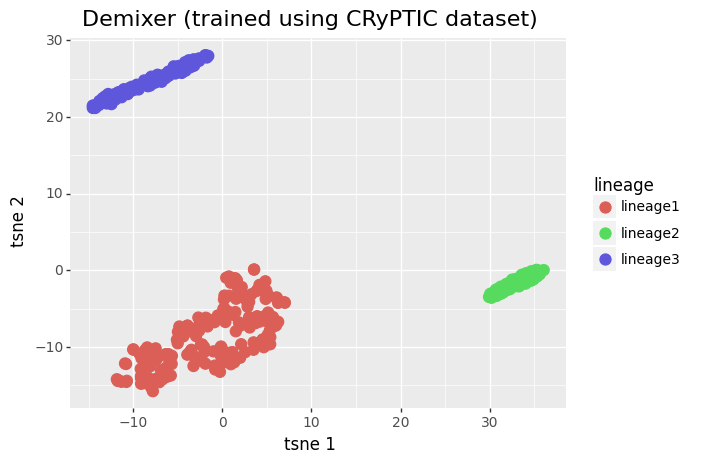

In [8]:
import pickle
filename = "../scripts/finaloutput/Cryptic_rerun/n_z_t0.dat"
fileobj = open(filename, mode='r')
n_z_t = np.fromfile(fileobj, dtype=np.uint32)
fileobj.close
n_z_t=n_z_t.reshape((71,148990))


with open('../scripts/finaloutput/Cryptic_rerun/Docs_col_name.pkl', 'rb') as f:
    Docs_col_name=pickle.load(f)
f.close();
cols_name=dict(zip(Docs_col_name,range(len(Docs_col_name))))

embed_Demixer=np.zeros((300,71))
j=0
for l in l_path:
        seq_record = list(SeqIO.parse(l, "fasta"))[0]
        l1_fasta=''.join(list(seq_record.seq))
        for i in range(0,len(l1_fasta)):
            if(l1_fasta[i]!=ref_fasta[i]):
                col_id=ref_fasta[i]+str(i+1)+l1_fasta[i]
                if(cols_name.get(col_id) is not None):
                    ind=cols_name.get(col_id)
                    embed_Demixer[j,:]=n_z_t[:,ind]
                    j=j+1
                    
tsne = TSNE(n_components=2, random_state=40)
embedding_2d = tsne.fit_transform(embed_Demixer)

df=pd.DataFrame()
df["tsne_1"]=embedding_2d[:,0]
df["tsne_2"]=embedding_2d[:,1]
df["lineage"]=lineage[0]

plot = (
    ggplot(df) +
    aes(x='tsne_1', y='tsne_2', color='lineage') +  # Map 'lineage' to color
    geom_point(size=4) +  # Create scatter plot
    labs(title='Demixer (trained using CRyPTIC dataset)', x='tsne 1', y='tsne 2') +  # Titles and axis labels
       theme(
            plot_title=element_text(size=16),                  # Title font size
            axis_title_x=element_text(size=12),                # X-axis title font size
            axis_title_y=element_text(size=12),                # Y-axis title font size
            axis_text_x=element_text(size=10),                 # X-axis tick labels font size
            axis_text_y=element_text(size=10),                 # Y-axis tick labels font size
            legend_title=element_text(size=12),                # Legend title font size
            legend_text=element_text(size=10)                  # Legend labels font size
        ) 
)

# Display the plot
plot.save("tsne_plot_Demixer.png", width=8, height=10, dpi=300)
print(plot)

In [11]:
import pandas as pd
gt=pd.read_csv("../scripts/db/invitro_Deep_groundtruth.csv")

In [13]:
Demixer=pd.read_csv("../scripts/finaloutput/invitro_Deep/n_m_z0.txt",delimiter='\s+',header=None)
Demixer_array=np.zeros((48,4))
Demixer_array[:,0:3]=Demixer.iloc[:,0:3]
Demixer_array[:,3]=Demixer[3]+Demixer[4]

DeepMicrobes=pd.read_csv("../scripts/db/Deepmicrobes_invitro.csv",header=None)

DeepMicrobes_array=np.zeros((48,4))
DeepMicrobes_array[:,0:3]=DeepMicrobes.iloc[:,0:3]

In [14]:
Demixer_processed=(Demixer_array == Demixer_array.max(axis=1, keepdims=True)).astype(int)
DeepMicrobes_processed=(DeepMicrobes_array == DeepMicrobes_array.max(axis=1, keepdims=True)).astype(int)

In [15]:
comparison1 = np.all(gt == Demixer_processed, axis=1).astype(int)
comparison2 = np.all(gt == DeepMicrobes_processed, axis=1).astype(int)
accuracy_Demixer=np.sum(comparison1)/48
accuracy_DeepMicrobes=np.sum(comparison2)/48
print(accuracy_Demixer,accuracy_DeepMicrobes)

0.9791666666666666 0.6458333333333334


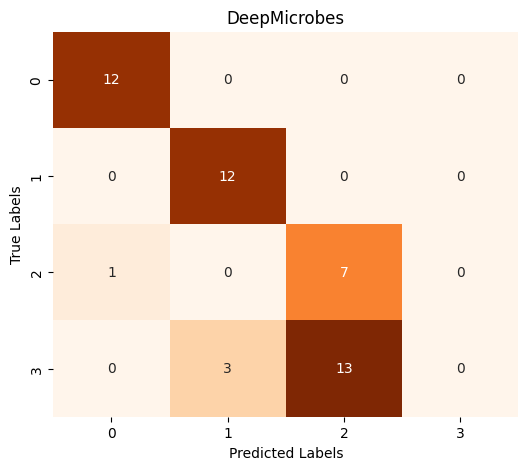

[[12  0  0  0]
 [ 0 12  0  0]
 [ 1  0  7  0]
 [ 0  3 13  0]]


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Demixer_processed=np.argmax(Demixer_array, axis=1)
DeepMicrobes_processed=np.argmax(DeepMicrobes_array, axis=1)        
gt_processed=np.argmax(gt.values, axis=1)

# Generate confusion matrix
cm = confusion_matrix(gt_processed, DeepMicrobes_processed)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DeepMicrobes')

# Display the plot
plt.show()


# Print the confusion matrix
print(cm)

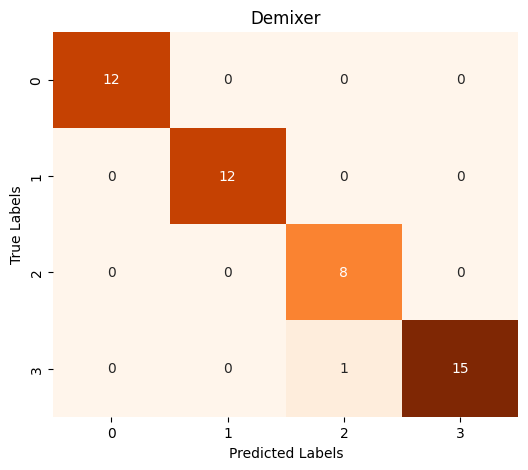

[[12  0  0  0]
 [ 0 12  0  0]
 [ 0  0  8  0]
 [ 0  0  1 15]]


In [17]:
# Generate confusion matrix
cm = confusion_matrix(gt_processed, Demixer_processed)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Demixer')

# Display the plot
plt.show()


# Print the confusion matrix
print(cm)